# Загрузка библиотек и данных

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# для нормализации, стандартизации
from sklearn import preprocessing

# импортируем библиотеку для работы с кодировщиками
import category_encoders as ce

# импортируем объект Counter из модуля collections
from collections import Counter

# импортируем класс SentimentIntensityAnalyzer из библиотеки nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')

# загружаем специальный удобный инструмент для разделения датасета
from sklearn.model_selection import train_test_split

# библиотеки для оценки значимости
from sklearn.feature_selection import chi2 # хи-квадрат
from sklearn.feature_selection import f_classif # anova

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/azudilins/nltk_data...


In [4]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [5]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [6]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/home/azudilins/Documents/Data/'
df_train = pd.read_csv(DATA_DIR+'hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'submission.csv') # самбмишн

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [8]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [10]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [12]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [13]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

# Создание новых признаков

#### 1. Работа с колонкой 'hotel_address'

In [15]:
# посмотрим, какую информацию содержит в себе колонка 'hotel_address'
list(data['hotel_address'].unique())[:10]

['Via Senigallia 6 20161 Milan Italy',
 'Arlandaweg 10 Westpoort 1043 EW Amsterdam Netherlands',
 'Mallorca 251 Eixample 08008 Barcelona Spain',
 'Piazza Della Repubblica 17 Central Station 20124 Milan Italy',
 'Singel 303 309 Amsterdam City Center 1012 WJ Amsterdam Netherlands',
 'Coram Street Camden London WC1N 1HT United Kingdom',
 'Empire Way Wembley Brent London HA9 8DS United Kingdom',
 '1 Shortlands Hammersmith and Fulham London W6 8DR United Kingdom',
 '35 Rue Caumartin 9th arr 75009 Paris France',
 '49 Gloucester Place Marble Arch Westminster Borough London W1U 8JE United Kingdom']

In [16]:
# создаём функцию для извлечения города из адреса
def get_city(address):
    address_list = address.split(' ')
    if address_list[-2] == 'United' and address_list[-1] == 'Kingdom':
        return address_list[-5]
    else:
        return address_list[-2]

# создаём функцию для извлечения страны из адреса
def get_country(address):
    address_list = address.split(' ')
    if address_list[-2] == 'United' and address_list[-1] == 'Kingdom':
        return address_list[-2] + ' ' + address_list[-1]
    else:
        return address_list[-1]

# создаём колонки с названиями городов и стран
data['city'] = data['hotel_address'].apply(get_city)
data['country'] = data['hotel_address'].apply(get_country)

# проверяем полученные данные
print('Города:', data['city'].unique())
print('Страны:', data['country'].unique())

Города: ['Milan' 'Amsterdam' 'Barcelona' 'London' 'Paris' 'Vienna']
Страны: ['Italy' 'Netherlands' 'Spain' 'United Kingdom' 'France' 'Austria']


In [17]:
# извлекаем из Википедии информацию о населении и площади имеющихся у нас городов и стран
city_data = pd.DataFrame({
    'city': ['Milan', 'Amsterdam', 'Barcelona', 'London', 'Paris', 'Vienna'],
    'city_population': [1378689, 872757, 1636732, 8961989, 2148327, 1897491],
    'city_area': [181.67, 219.4, 101.3, 1602, 105.4, 414.75]
})
country_data = pd.DataFrame({
    'country': ['Italy', 'Netherlands', 'Spain', 'United Kingdom', 'France', 'Austria'],
    'country_population': [59236213, 17665300, 46552504, 67081000, 68084217, 8923507],
    'country_area': [302073, 41543, 505990, 242495, 643801, 83879]
})

# добавим колонки с плотностью населения
city_data['city_density'] = (city_data['city_population'] / city_data['city_area']).astype('int')
country_data['country_density'] = (country_data['country_population'] / country_data['country_area']).astype('int')

# добавляем полученные данные к датасету с отелями
data = data.join(city_data.set_index('city'), on = 'city')
data = data.join(country_data.set_index('country'), on = 'country')

In [18]:
# создадим дополнительную колонку-индикатор, находится ли отель в столице
capitals = ['Amsterdam', 'London', 'Paris', 'Vienna']
data['is_capital'] = data['city'].apply(lambda x: 1 if x in capitals else 0)

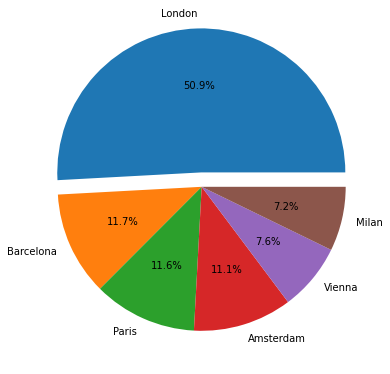

In [19]:
# визуализируем распределение данных по городам
city_data = data['city'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    city_data,
    labels = city_data.index,
    autopct = '%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0]
);

#### 2. Работа с колонкой 'review_date'

In [20]:
# преобразовываем колонку даты в формат datetime
data['review_date'] = pd.to_datetime(data['review_date'])

# извлекаем день недели из даты
data['day_of_week'] = data['review_date'].dt.dayofweek

# извлекаем месяц из даты
data['month'] = data['review_date'].dt.month

In [21]:
# создаём и используем функцию для извлечения сезона
def get_season(date):
    if date.month in [1, 2, 12]:
        return 'winter'
    if date.month in [3, 4, 5]:
        return 'spring'
    if date.month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'
data['season'] = data['review_date'].apply(get_season)

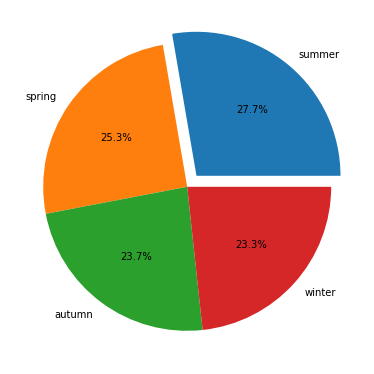

In [22]:
# визуализируем распределение данных по сезонам
season_data = data['season'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    season_data,
    labels = season_data.index,
    autopct = '%.1f%%',
    explode = [0.1, 0, 0, 0]
);

#### 3. Работа с колонкой 'hotel_name'

In [23]:
# поищем найболее полезные слова в названиях отелей
words = []
for hotel in data['hotel_name'].values:
    words.extend(hotel.split(' '))

# создаём объект Counter и передаём в него полученные слова для подсчёта
word_counts = Counter(words)

# с помощью метода most_common() наблюдаю найболее популярные слова
word_counts.most_common()[:10]

[('Hotel', 234378),
 ('London', 137227),
 ('The', 58053),
 ('Park', 43929),
 ('Amsterdam', 39868),
 ('Hilton', 35490),
 ('by', 24369),
 ('Plaza', 23105),
 ('Paris', 21792),
 ('Grand', 18430)]

In [24]:
# выберем 15 слов, которые на мой взгляд могут на что-то влиять
words_to_apply = [
    'park', 'hilton', 'plaza', 'grand', 'inn', 'city', 'holiday', 'western',
    'palace', 'radisson', 'blu', 'mercure', 'tower', 'paddington', 'novotel'
]

# перебираем выбранные слова и создаём колонки-индикаторы, указывающие, содеражат ли отели эти слова в названии
for word in words_to_apply:
    data[word + '_hotel'] = data['hotel_name'].apply(
        lambda x: 1 if word in x.lower() else 0
    )

#### 4. Работа с колонкой 'reviewer_nationality'

In [25]:
# для начала очистим значения от лишних пробелов
data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x.strip())

# отмечаем является ли рецензент гражданином страны, в которой находится отель
data['is_citizen'] = data['reviewer_nationality'] == data['country']
data['is_citizen'] = data['is_citizen'].astype('int')

# оставим в списке только 15 самых популярных национальностей, остальные заполним значением 'other'
top_nations = list(data['reviewer_nationality'].value_counts()[:15].index)
data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x if x in top_nations else 'other')

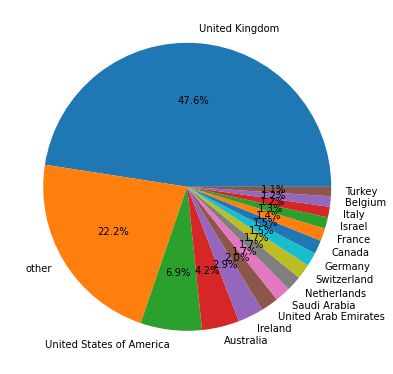

In [26]:
# визуализируем распределение данных по гражданству
reviewer_data = data['reviewer_nationality'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    reviewer_data,
    labels = reviewer_data.index,
    autopct = '%.1f%%'
);

#### 5. Работа с колонками 'negative_review' и 'positive_review'

In [27]:
# посмотрим на самые популярные отзывы
display(data['negative_review'].value_counts()[:10])
print() # отступ
display(data['positive_review'].value_counts()[:10])

No Negative    127890
 Nothing        14295
 Nothing         4236
 nothing         2225
 N A             1037
 None             984
                  849
 N a              509
 Breakfast        407
 Small room       373
Name: negative_review, dtype: int64

No Positive        35946
 Location           9222
 Everything         2284
 location           1677
 Nothing            1243
 The location       1126
 Great location     1047
 Good location       927
 Location            915
 Everything          613
Name: positive_review, dtype: int64

Для выражения негативных и позитивных отзывов в числовом формате будем использовать класс SentimentIntensityAnalyzer из библиотеки nltk. Для его коректной работы необходимы некоторые преобразования в значениях нашего датасета.

In [28]:
# уберём лишние пробелы и приведём все символы к нижнему регистру
data['negative_review'] = data['negative_review'].apply(
    lambda x: x.strip().lower()
)
data['positive_review'] = data['positive_review'].apply(
    lambda x: x.strip().lower()
)

# отсутствие отзывов дающее эмоциональную окраску заполняем пустыми строками
not_negative = [
    'no negative', 'no complaints', 'nothing all good', 'having to leave',
    'nothing it was perfect', 'nothing everything was perfect',
    'there was nothing i didn t like', 'no'
]
not_positive = ['no positive']

data['negative_review'] = data['negative_review'].apply(
    lambda x: '' if x in not_negative else x
)
data['positive_review'] = data['positive_review'].apply(
    lambda x: '' if x in not_positive else x
)

# популярные значения, имеющие эмоциональную окраску в зависимости от того, в какой
# колонке они находятся, дополним суффиксом в соответствии с названием колонки
real = [
    'location', 'the location', 'everything', 'small room', 'breakfast',
    'price', 'small rooms', 'staff', 'location and staff', 'location staff',
    'location location location', 'comfy bed', 'expensive', 'room size',
    'expensive breakfast', 'the price', 'the staff', 'all', 'every thing',
    'cleanliness', 'location breakfast', 'location only', 'wifi', 'pillows',
    'parking', 'size of room', 'the breakfast', 'breakfast too expensive',
    'central location', 'staff and location', 'the bed', 'convenient location',
    'position', 'location and breakfast'
]

data['positive_review'] = data['positive_review'].apply(
    lambda x: x + ' positive' if x in real else x
)
data['negative_review'] = data['negative_review'].apply(
    lambda x: x + ' negative' if x in real else x
)

In [29]:
# создаём класс SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

# создаём колонки с числовым выражением отзывов
data['negative_neg'] = data['negative_review'].apply(
    lambda x: sent_analyzer.polarity_scores(x)['neg']
)
data['negative_neu'] = data['negative_review'].apply(
    lambda x: sent_analyzer.polarity_scores(x)['neu']
)
data['negative_pos'] = data['negative_review'].apply(
    lambda x: sent_analyzer.polarity_scores(x)['pos']
)
data['negative_compound'] = data['negative_review'].apply(
    lambda x: sent_analyzer.polarity_scores(x)['compound']
)
data['positive_neg'] = data['positive_review'].apply(
    lambda x: sent_analyzer.polarity_scores(x)['neg']
)
data['positive_neu'] = data['positive_review'].apply(
    lambda x: sent_analyzer.polarity_scores(x)['neu']
)
data['positive_pos'] = data['positive_review'].apply(
    lambda x: sent_analyzer.polarity_scores(x)['pos']
)
data['positive_compound'] = data['positive_review'].apply(
    lambda x: sent_analyzer.polarity_scores(x)['compound']
)

#### 6. Работа с колонкой 'tags'

In [30]:
# создаём полный список тэгов
tags = []
for tag_list in data['tags'].values:
    tag_list = tag_list.replace("[' ", "")
    tag_list = tag_list.replace(" ']", "")
    tag_list = tag_list.split(" ', ' ")
    tags.extend(tag_list)

# подсчитываем количество тэгов с помощью класса Counter
tag_counter = Counter(tags)
sorted_tags = list(tag_counter.most_common())
sorted_tags[:10]

[('Leisure trip', 417778),
 ('Submitted from a mobile device', 307640),
 ('Couple', 252294),
 ('Stayed 1 night', 193645),
 ('Stayed 2 nights', 133937),
 ('Solo traveler', 108545),
 ('Stayed 3 nights', 95821),
 ('Business trip', 82939),
 ('Group', 65392),
 ('Family with young children', 61015)]

In [31]:
# создаём функцию и извлекаем количество ночей, проведённых в отеле
def get_stayed_nights(tags):
    tags_list = tags.split(' ')
    if 'Stayed' in tags_list:
        night_index = tags_list.index('Stayed') + 1
        return int(tags_list[night_index])
    else:
        return np.NaN

data['stayed_nights'] = data['tags'].apply(get_stayed_nights)


# дополним датасет ещё 15 колонками-индикаторами самых популярных тэгов
new_columns = []

for tag, count in sorted_tags:
    if 'Stayed' not in tag:
        new_columns.append(tag)    
        
for column in new_columns[:15]:
    data[column] = data['tags'].apply(lambda x: 1 if column in x else 0)

#### 7. Работа с колонкой 'days_since_review'

In [32]:
# разбиваем колонку по пробелу и оставляем только числовую часть данных
data['days_since_review'] = data['days_since_review'].apply(
    lambda x: int(x.split(' ')[0])
)

#### 8. Кодирование признаков

In [33]:
# Номинальные признаки содержащие не более 16 уникальных значений, кодируем используя класс OneHotEncoding.
encoder = ce.OneHotEncoder(
    cols = ['city', 'day_of_week', 'month', 'season', 'reviewer_nationality']
)
data_bin = encoder.fit_transform(
    data[['city', 'day_of_week', 'month', 'season', 'reviewer_nationality']]
)
data = pd.concat([data, data_bin], axis = 1)

# Очистка от пропущенных значений

In [34]:
# заполним пропуски в географических координатах модальным значением в зависимости от города
data['lat'] = data['lat'].fillna(
    data.groupby(['city'])['lat'].transform(lambda x: x.mode()[0])
)
data['lng'] = data['lng'].fillna(
    data.groupby(['city'])['lng'].transform(lambda x: x.mode()[0])
)

# пропущенные значения в колонке 'stayed_nights' заполняем модальным значением
data['stayed_nights'].fillna(data['stayed_nights'].mode()[0], inplace=True)
# и заменяем тип данных на 'int'
data['stayed_nights'] = data['stayed_nights'].astype('int')

# Удаление строковых значений

In [35]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace = True)

# удаляем колонку с типом datetime
data.drop('review_date', axis = 1, inplace = True)

# удаляем колонки 'day_of_week' и 'month', которые уже закодированы как категориальные
data = data.drop(['day_of_week', 'month'], axis = 1)

# Преобразование признаков

Так как у нас получилось очень много бинарных признаков (со значением 0 или 1), то и остальные признаки будет логичным привести к этому диапозону.

In [36]:
# сохраняем колонки которые будем преобразовывать
col_names = []
for col in data.columns:
    if (data[col].min() < 0 or data[col].max() > 1) and col != 'reviewer_score':
        col_names.append(col)

# выводим полученный результат
print('Колонки к преобразованию:')
for col in col_names:
    print(col)

Колонки к преобразованию:
additional_number_of_scoring
average_score
review_total_negative_word_counts
total_number_of_reviews
review_total_positive_word_counts
total_number_of_reviews_reviewer_has_given
days_since_review
lat
lng
city_population
city_area
city_density
country_population
country_area
country_density
negative_compound
positive_compound
stayed_nights


In [37]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# создаём нормализованные колонки
data_mm = mm_scaler.fit_transform(data[col_names])

# преобразуем промежуточный датасет в полноценный датафрейм
data_mm = pd.DataFrame(data_mm, columns = col_names)

# удаляем преобразованные колонки из исходного датасета
data = data.drop(col_names, axis = 1)

# объеденяем данные
data = pd.concat([data_mm, data], axis = 1)

# Отбор признаков

#### 1. Анализ мультиколлинеарности

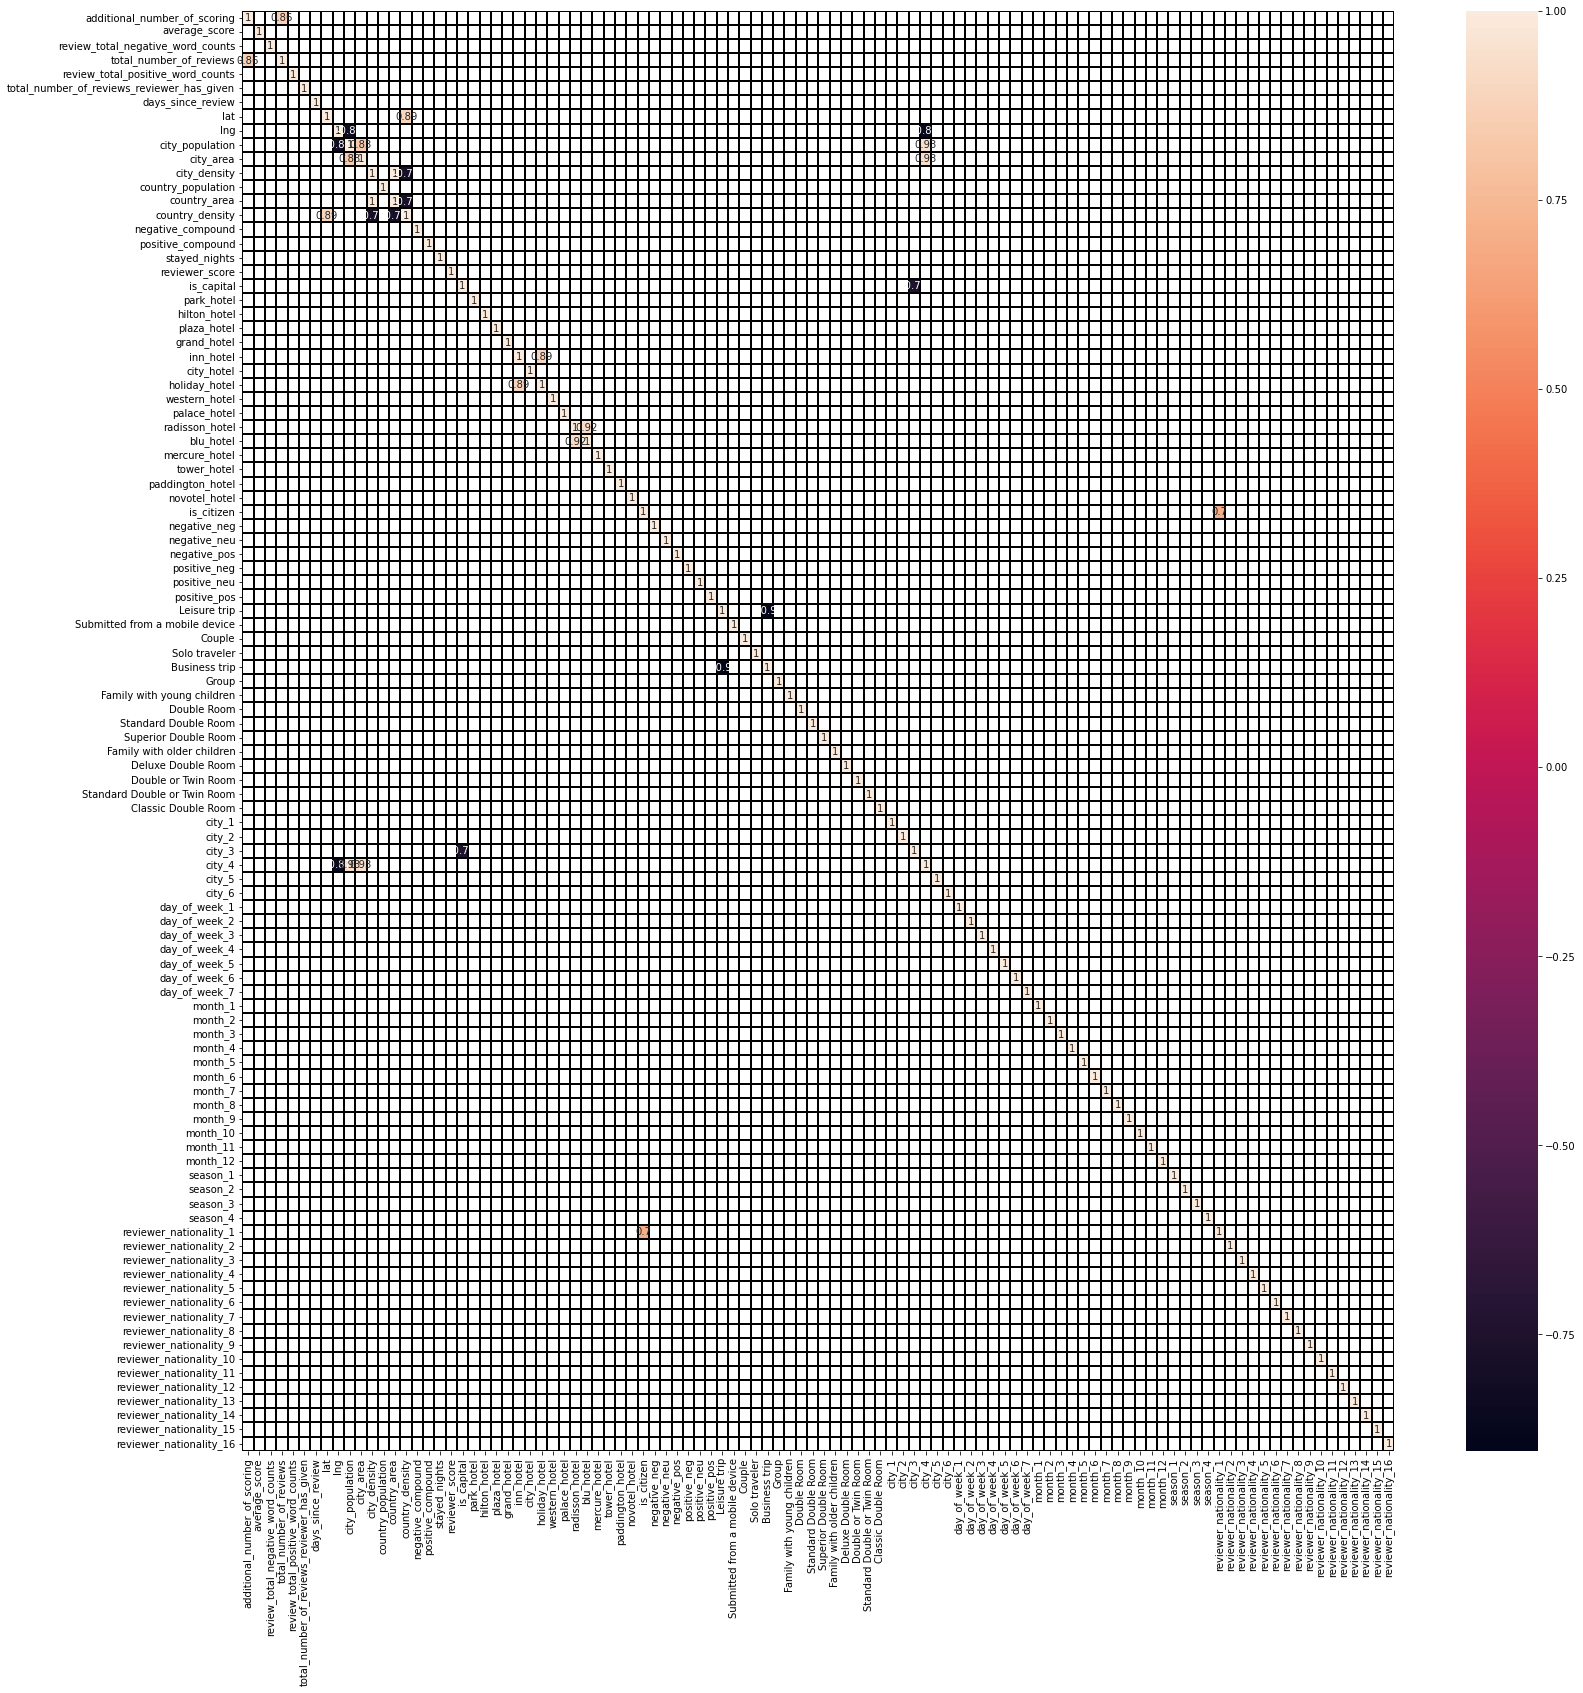

In [38]:
# для корреляции с категориальными признаками будем использовать метод Спирмена
corr = data.drop(['sample'], axis=1).corr(method = 'spearman')

# выведем только данные с высоким уровнем корреляции
mask_1 = np.abs(corr) >= 0.70
mask_2 = np.abs(corr) <= -0.70
corr_data = corr[mask_1 | mask_2]

fig = plt.figure(figsize=(20, 20))
axes = fig.add_axes([0, 0, 1, 1])
sns.heatmap(corr_data, annot=True, ax=axes, linewidth=0.3, linecolor='black');

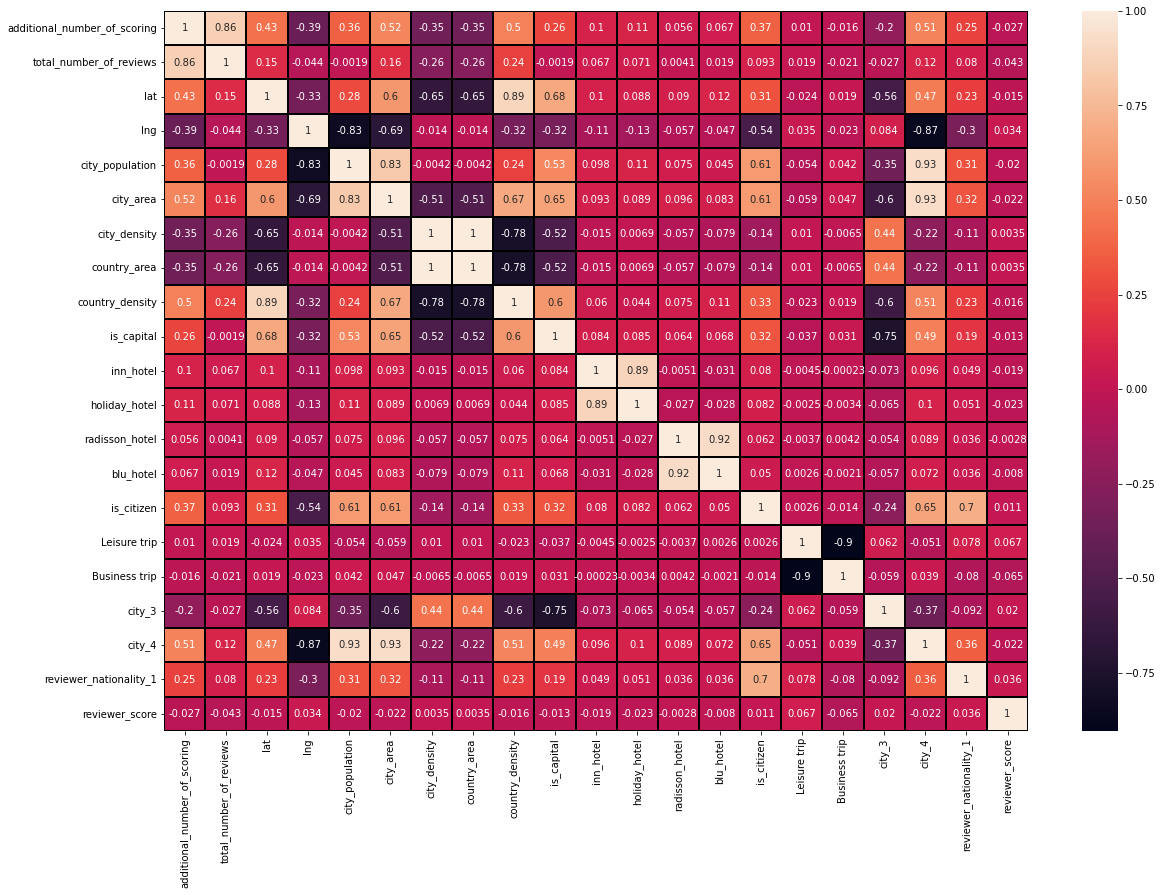

In [39]:
# чтобы понять какие признаки удалить, посмотрим как они коррелируют с целевым признаком 'reviewer_score'
corr = data[[
    'additional_number_of_scoring', 'total_number_of_reviews', 'lat', 'lng',
    'city_population', 'city_area', 'city_density', 'country_area',
    'country_density', 'is_capital', 'inn_hotel', 'holiday_hotel',
    'radisson_hotel', 'blu_hotel', 'is_citizen', 'Leisure trip',
    'Business trip', 'city_3', 'city_4', 'reviewer_nationality_1',
    'reviewer_score'
]].corr(method = 'spearman')

fig = plt.figure(figsize=(15, 10))
axes = fig.add_axes([0, 0, 1, 1])
sns.heatmap(corr, annot=True, ax=axes, linewidth=0.3, linecolor='black');

In [40]:
# удаляем те признаки, которые меньше коррелируют с целевым признаком
data = data.drop([
    'radisson_hotel', 'city_density', 'country_area', 'is_citizen',
    'is_capital', 'lat', 'inn_hotel', 'city_population', 'city_4',
    'additional_number_of_scoring', 'Business trip'
], axis = 1)

#### 2. Оценка значимости признаков

In [41]:
# разбиваем датафрейм на части, необходимые для оценки значимости
# X - данные с информацией об отелях, y - целевая переменная (рейтинги отелей)
X = data.drop(['reviewer_score'], axis = 1)
y = data['reviewer_score'].astype('int')


# разделяем признаки на непрерывные и категориальные
num_cols = [
    'average_score', 'review_total_negative_word_counts',
    'total_number_of_reviews', 'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given', 'days_since_review',
    'city_area', 'country_population', 'country_density', 'negative_compound',
    'positive_compound', 'stayed_nights', 'negative_neg', 'negative_neu',
    'negative_pos', 'positive_neg', 'positive_neu', 'positive_pos'
]
cat_cols = [
    'lng', 'park_hotel', 'hilton_hotel', 'plaza_hotel',
    'grand_hotel', 'city_hotel', 'holiday_hotel', 'western_hotel',
    'palace_hotel', 'blu_hotel', 'mercure_hotel',
    'tower_hotel', 'paddington_hotel', 'novotel_hotel',
    'Leisure trip', 'Submitted from a mobile device', 'Couple',
    'Solo traveler', 'Group', 'Family with young children',
    'Double Room', 'Standard Double Room', 'Superior Double Room',
    'Family with older children', 'Deluxe Double Room', 'Double or Twin Room',
    'Standard Double or Twin Room', 'Classic Double Room', 'city_1', 'city_2',
    'city_3', 'city_5', 'city_6', 'day_of_week_1', 'day_of_week_2',
    'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
    'day_of_week_7', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
    'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
    'month_12', 'season_1', 'season_2', 'season_3', 'season_4',
    'reviewer_nationality_1', 'reviewer_nationality_2',
    'reviewer_nationality_3', 'reviewer_nationality_4',
    'reviewer_nationality_5', 'reviewer_nationality_6',
    'reviewer_nationality_7', 'reviewer_nationality_8',
    'reviewer_nationality_9', 'reviewer_nationality_10',
    'reviewer_nationality_11', 'reviewer_nationality_12',
    'reviewer_nationality_13', 'reviewer_nationality_14',
    'reviewer_nationality_15', 'reviewer_nationality_16'
]

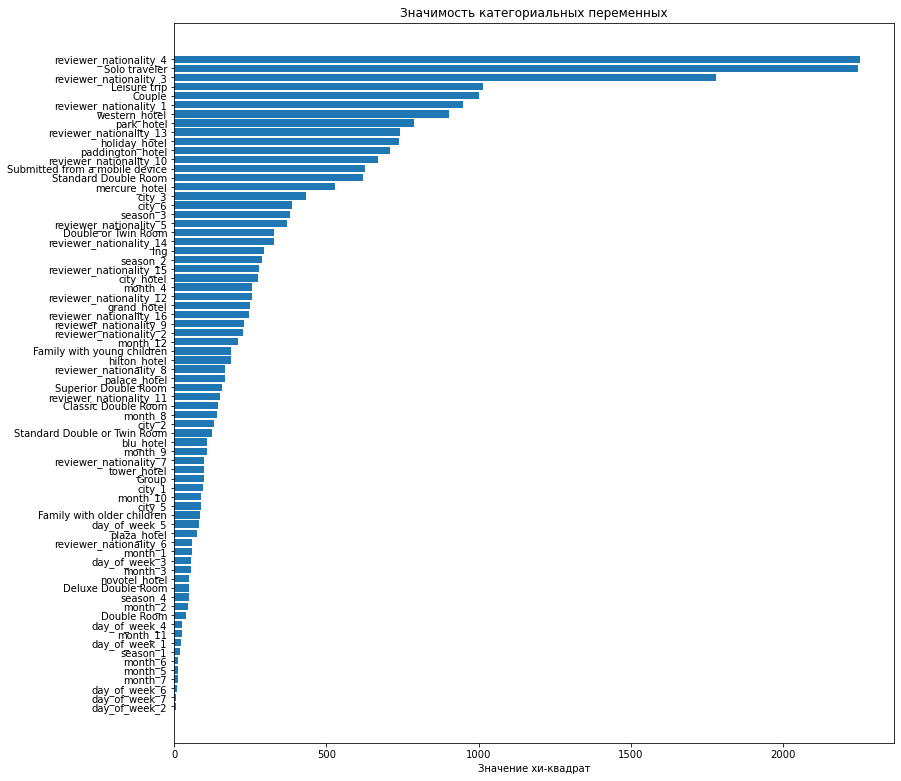

In [42]:
# для оценки значимости категориальных переменных будем использовать непараметрический тест хи-квадрат
imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index = cat_cols)
imp_cat.sort_values(inplace = True)

# визуализируем полученные результаты
fig = plt.figure(figsize=(10, 10))
axes = fig.add_axes([0, 0, 1, 1])
axes.barh(imp_cat.index, imp_cat)
axes.set_title('Значимость категориальных переменных')
axes.set_xlabel('Значение хи-квадрат');

In [43]:
# оставим только найболее значимую половину категориальных признаков
cols_to_drop = imp_cat[imp_cat.values < imp_cat.median()]
data = data.drop(cols_to_drop.index, axis = 1)

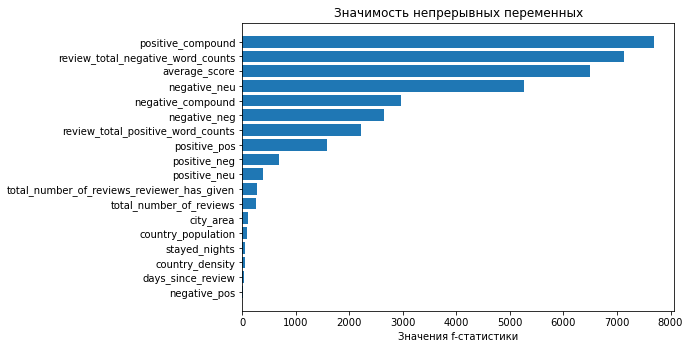

In [44]:
# для оценки значимости непрерывных переменных будем использовать функцию f_classif
imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)

# визуализируем полученные результаты
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.barh(imp_num.index, imp_num)
axes.set_title('Значимость непрерывных переменных')
axes.set_xlabel('Значения f-cтатистики');

In [45]:
# оставим только найболее значимую половину числовых признаков
cols_to_drop = imp_num[imp_num.values < imp_num.median()]
data = data.drop(cols_to_drop.index, axis = 1)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   average_score                      515738 non-null  float64
 1   review_total_negative_word_counts  515738 non-null  float64
 2   review_total_positive_word_counts  515738 non-null  float64
 3   lng                                515738 non-null  float64
 4   negative_compound                  515738 non-null  float64
 5   positive_compound                  515738 non-null  float64
 6   sample                             515738 non-null  int64  
 7   reviewer_score                     515738 non-null  float64
 8   park_hotel                         515738 non-null  int64  
 9   hilton_hotel                       515738 non-null  int64  
 10  grand_hotel                        515738 non-null  int64  
 11  city_hotel                         5157

# Этап машинного обучения

In [47]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [48]:
# Воспользуемся специальной функцией train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [49]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 46), (386803, 46), (386803, 45), (309442, 45), (77361, 45))

In [50]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [51]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [52]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 20.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.7s finished


In [53]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.8755444773431906


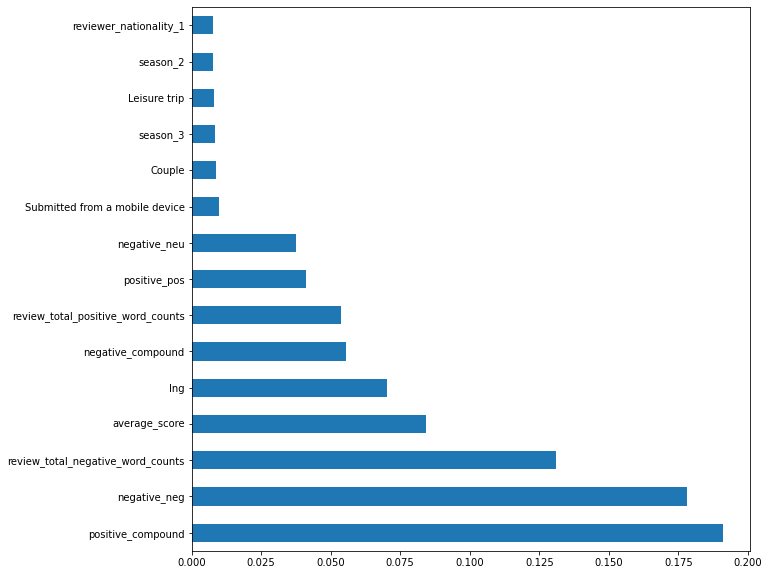

In [54]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh');

In [55]:
test_data.sample(10)

,average_score,review_total_negative_word_counts,review_total_positive_word_counts,lng,negative_compound,positive_compound,reviewer_score,park_hotel,hilton_hotel,grand_hotel,...,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_8,reviewer_nationality_9,reviewer_nationality_10,reviewer_nationality_12,reviewer_nationality_13,reviewer_nationality_14,reviewer_nationality_15,reviewer_nationality_16
112177,0.717391,0.007353,0.000000,0.566257,0.228567,0.495964,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31019,0.826087,0.000000,0.030380,0.013076,0.500451,0.744502,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26164,0.630435,0.105392,0.020253,0.010599,0.504262,0.324455,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21273,0.673913,0.022059,0.048101,0.570352,0.500451,0.896439,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
63701,0.695652,0.019608,0.020253,0.015105,0.612754,0.678168,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
21698,0.804348,0.000000,0.007595,0.009901,0.500451,0.495964,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31039,0.652174,0.014706,0.000000,0.012685,0.500451,0.495964,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
41370,0.565217,0.049020,0.027848,0.151701,0.786674,0.880851,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104375,0.739130,0.046569,0.058228,0.150996,0.500451,0.972609,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77762,0.717391,0.034314,0.015190,0.015684,0.228567,0.495964,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [57]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [58]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.3s finished


In [59]:
predict_submission

array([8.663, 7.9  , 8.214, ..., 8.048, 9.553, 7.326])

In [60]:
list(sample_submission)

['reviewer_score', 'id']

In [61]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.663,488440
1,7.900,274649
2,8.214,374688
3,9.708,404352
4,9.677,451596
5,8.717,302161
6,7.476,317079
7,7.743,13963
8,8.232,159785
9,7.419,195089
